
# Facebook Live Sellers Dataset — Analysis & Clustering (Structured)

This notebook restructures your Python script into clear Markdown and Code cells.  
It loads the dataset, preprocesses engagement fields, explores distributions and correlations, and performs **K-Means clustering** with an **elbow method** to choose K.

> **Action required:** Update the `file_path` variable in the *Load Dataset* cell to point to your CSV.


## 1. Imports

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

# Plot style
plt.rcParams['figure.figsize'] = (8, 4)
sns.set(style="whitegrid")


## 2. Load Dataset

In [8]:
# Set your dataset path here:
file_path = r'/content/Facebook_Marketplace_data.csv'  # <-- change if needed

try:
    df = pd.read_csv(file_path)
    print("✅ Dataset loaded successfully.")
except FileNotFoundError:
    raise FileNotFoundError(f"Error: The file '{file_path}' was not found. Please check the file path.")

print("Preview:")
display(df.head())
print(df.info())

✅ Dataset loaded successfully.
Preview:


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

## 3. Data Preprocessing

In [9]:

# Convert status_published to datetime
df['status_published'] = pd.to_datetime(df['status_published'], errors='coerce')

# Drop rows with missing engagement metrics (keep rows where any of them exist)
required_cols = ['num_reactions', 'num_comments', 'num_shares']
df = df.dropna(subset=required_cols)

# Extract hour for time analysis
df['hour'] = df['status_published'].dt.hour

print("Rows after preprocessing:", len(df))
df[required_cols + ['status_published','hour']].head()


Rows after preprocessing: 7050


,num_reactions,num_comments,num_shares,status_published,hour
0,529,512,262,2018-04-22 06:00:00,6
1,150,0,0,2018-04-21 22:45:00,22
2,227,236,57,2018-04-21 06:17:00,6
3,111,0,0,2018-04-21 02:29:00,2
4,213,0,0,2018-04-18 03:22:00,3


## 4. Q5 — Count of Different Post Types

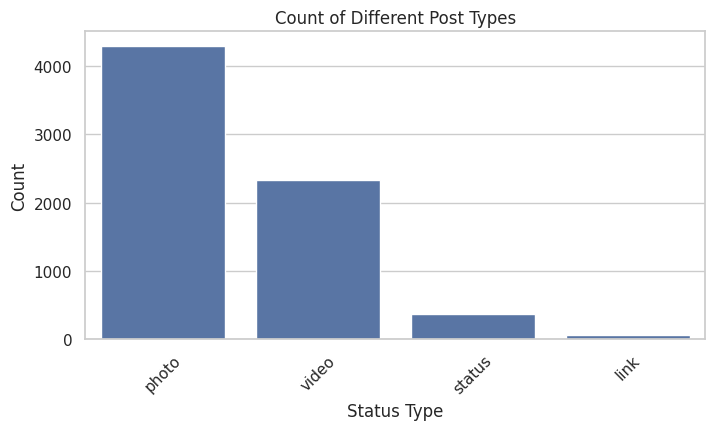

Count of different types of posts:
status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


In [10]:

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='status_type', order=df['status_type'].value_counts().index)
plt.title('Count of Different Post Types')
plt.xlabel('Status Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print("Count of different types of posts:")
print(df['status_type'].value_counts())


## 5. Q6 — Average Engagement per Post Type

Average engagement metrics for each post type:


,num_reactions,num_comments,num_shares
status_type,,,
link,370.14,5.70,4.40
photo,181.29,15.99,2.55
status,438.78,36.24,2.56
video,283.41,642.48,115.68


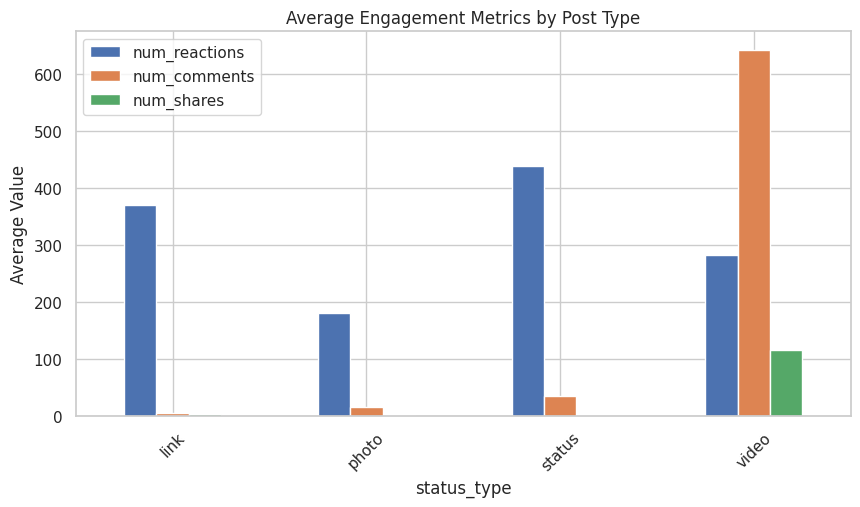

In [11]:

avg_metrics_by_type = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean().round(2)
print("Average engagement metrics for each post type:")
display(avg_metrics_by_type)

avg_metrics_by_type.plot(kind='bar', figsize=(10,5))
plt.title('Average Engagement Metrics by Post Type')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()


## 6. Q1 — Time of Upload vs Number of Reactions

/tmp/ipython-input-369218186.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='hour', y='num_reactions', data=average_reactions_by_hour, ci=None)


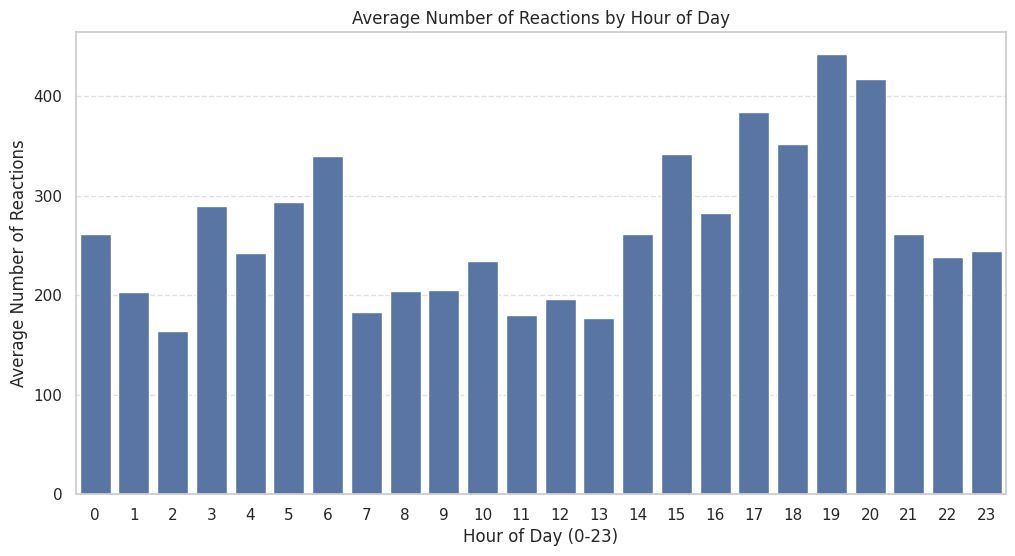

In [12]:

average_reactions_by_hour = df.groupby('hour')['num_reactions'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='num_reactions', data=average_reactions_by_hour, ci=None)
plt.title('Average Number of Reactions by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Average Number of Reactions')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


## 7. Q2 — Correlation Analysis of Engagement Metrics

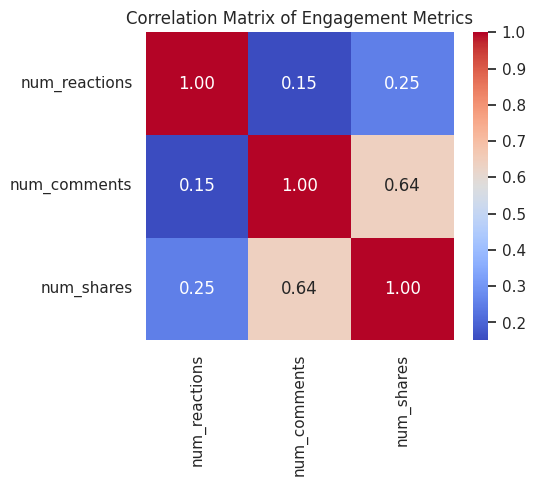

Correlation Matrix:
               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


In [13]:

correlation_columns = ['num_reactions', 'num_comments', 'num_shares']
corr = df[correlation_columns].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

print("Correlation Matrix:")
print(corr)


## 8. Q4 — Elbow Method for K-Means

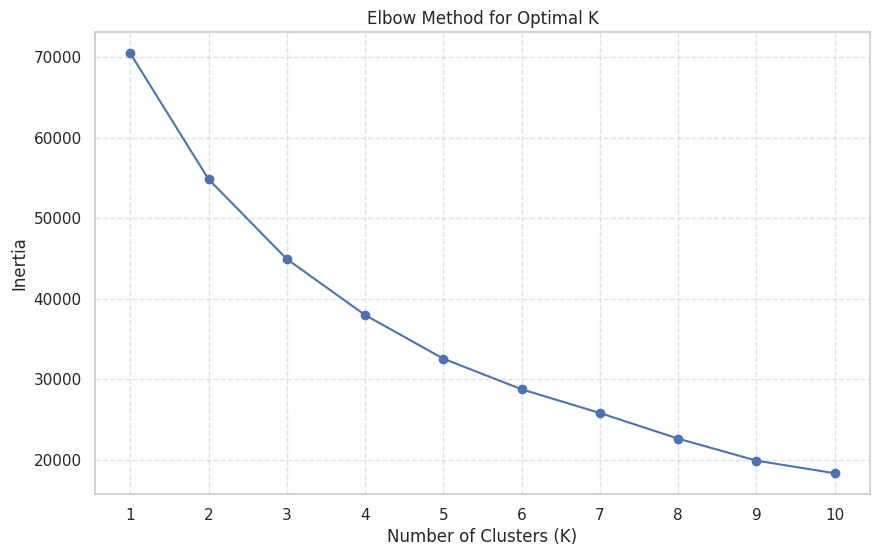

Tip: Pick the K where the inertia curve noticeably bends (often 3 or 4).


In [14]:

# Prepare features for clustering
clustering_features = df[['status_type', 'num_reactions', 'num_comments', 'num_shares',
                          'num_likes', 'num_loves', 'num_wows', 'num_hahas',
                          'num_sads', 'num_angrys']].copy()

# Encode categorical post type
le = LabelEncoder()
clustering_features['status_type_encoded'] = le.fit_transform(clustering_features['status_type'])
clustering_features.drop('status_type', axis=1, inplace=True)

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("Tip: Pick the K where the inertia curve noticeably bends (often 3 or 4).")


## 9. Q3 — K-Means Clustering & Cluster Profiles

In [16]:

optimal_k = 3  # change if elbow suggests otherwise
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_features)
df['cluster'] = clusters

print(f"K-Means model trained with K = {optimal_k}")
print("Distribution of posts per cluster:")
print(df['cluster'].value_counts())

# Cluster profiling on standardized features
cluster_features_df = pd.DataFrame(scaled_features, columns=clustering_features.columns, index=df.index)
cluster_features_df['cluster'] = df['cluster']
profile = cluster_features_df.groupby('cluster').mean().round(2)
print("\nCluster centroids (standardized feature means):")
display(profile)

# Cluster-wise post type distribution
df['status_type_encoded'] = le.inverse_transform(cluster_features_df['status_type_encoded'].astype(int))
cluster_type_distribution = (df.groupby('cluster')['status_type_encoded']
                               .value_counts(normalize=True)
                               .unstack()
                               .round(2)
                               .fillna(0))
print("\nCluster Post Type Distribution (row-normalized):")
display(cluster_type_distribution)


K-Means model trained with K = 3
Distribution of posts per cluster:
cluster
0    6376
1     365
2     309
Name: count, dtype: int64

Cluster centroids (standardized feature means):


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_encoded
cluster,,,,,,,,,,
0,-0.25,-0.14,-0.15,-0.24,-0.14,-0.09,-0.10,-0.06,-0.08,-0.05
1,3.48,-0.18,-0.22,3.60,-0.24,0.13,-0.13,-0.13,-0.15,-0.17
2,1.08,3.20,3.39,0.77,3.23,1.60,2.12,1.45,1.91,1.28


ValueError: y contains previously unseen labels: [-1]

## 10. (Optional) Save Outputs

In [17]:

# Example: save labeled dataframe to CSV in the same folder as this notebook
# df.to_csv('facebook_marketplace_with_clusters.csv', index=False)
pass
